In [15]:
from helpers import *
from gaussfit import *

In [16]:
# list of PMTs at 0 voltage form HV files
# + disconnected pmts: 290
offPMTs = [1, 111, 143, 166, 192, 230, 238, 254, 222, 302, 309, 340, 353, 290 ]

# drifting PMTs --> wait for full list
driftPMTs = [ 59, 63, 81, 93, 95, 142, 148, 169, 170, 179, 282]

Loading data from: ../calibrationdb/backgroundphotons_run9208_1670178880.csv


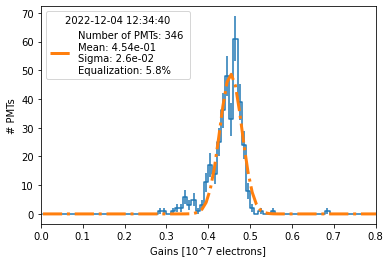

In [24]:
file  = "../calibrationdb/backgroundphotons_run9208_1670178880.csv"#getMostRecentCalibration()
timestamp=getTimestamp(file)

print( "Loading data from: "+ file )

data = getDataFrame(file, offPMTs, False)

data[["pmt", "q", "eq"]].to_csv("histogram_run9208_1670178880.csv")

fitOutput  = fitGainsDistribution( data, BINSIZE=0.01,RMIN=0.0,RMAX=1.0, p0=(0.5, 0.04) )

plt.xlim((0.0, 0.8))
plt = makeplot(timestamp, "fit_test.pdf", *fitOutput )

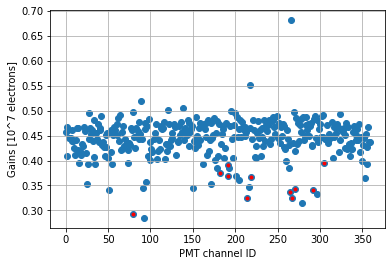

In [25]:
plt.scatter(data["pmt"],data["q"],marker="o")

drift_channels = PMTid_to_channel(driftPMTs)
drift_data = data[data['pmt'].isin(drift_channels)]
plt.scatter(drift_data["pmt"],drift_data["q"],marker=".",color="red")

plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

In [32]:
ch_high = data.loc[ data["q"] > 0.54, "pmt"]
ch_low = data.loc[ data["q"] < 0.4, "pmt"]

print("PMT channels above 0.54")
pmt_high = channel_to_PMTid(ch_high)
print("Channel ID:")
print( ch_high.to_numpy() )
print("PMT ID:")
print( pmt_high )

PMT channels above 0.54
Channel ID:
[218 266]
PMT ID:
[141, 94]


PMT channels below 0.4:
Channel ID:
[ 16  25  26  35  51  55  74  79  91  92  95 150 162 172 178 182 191 192
 193 201 205 214 216 219 260 263 265 267 270 279 292 296 305 349 353 356]
PMT ID:
[344, 333, 334, 323, 310, 303, 288, 282, 262, 263, 269, 201, 193, 183, 186, 179, 170, 169, 167, 160, 153, 148, 144, 142, 96, 97, 93, 95, 81, 90, 63, 67, 59, 20, 4, 7]
[0.39518  0.3536   0.392179 0.39227  0.340284 0.393354 0.395205 0.292487
 0.344321 0.284798 0.356282 0.345598 0.39365  0.351956 0.383983 0.374834
 0.390613 0.368628 0.38427  0.369267 0.360421 0.324452 0.346273 0.366852
 0.398768 0.384223 0.336868 0.325302 0.343366 0.314068 0.34067  0.331983
 0.395614 0.399415 0.364669 0.392138]


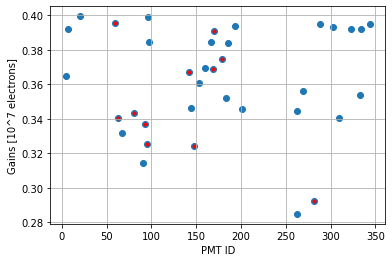

In [38]:
print("PMT channels below 0.4:" )
pmt_low = channel_to_PMTid(ch_low)
print("Channel ID:")
print( ch_low.to_numpy() )
print("PMT ID:")
print( pmt_low )

q_low = data.loc [ data["q"] < 0.4, "q"]
plt.scatter(pmt_low,q_low,marker="o")
plt.scatter(channel_to_PMTid(drift_data["pmt"].to_numpy()),drift_data["q"].to_numpy(),marker=".",color="red")
plt.xlabel("PMT ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

print( q_low.to_numpy())